<a href="https://colab.research.google.com/github/Sejalmali/Projects/blob/main/EDA_on_Airbnb_NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df=pd.read_csv("Airbnb NYC 2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43427 entries, 0 to 43426
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43427 non-null  int64  
 1   name                            43411 non-null  object 
 2   host_id                         43426 non-null  float64
 3   host_name                       43405 non-null  object 
 4   neighbourhood_group             43426 non-null  object 
 5   neighbourhood                   43426 non-null  object 
 6   latitude                        43426 non-null  float64
 7   longitude                       43426 non-null  float64
 8   room_type                       43426 non-null  object 
 9   price                           43426 non-null  float64
 10  minimum_nights                  43426 non-null  float64
 11  number_of_reviews               43426 non-null  float64
 12  last_review                     

##The distribution of values or identifying outliers at a glance. The gradient coloring helps to highlight high or low values in the DataFrame.

In [6]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
id,43427.000000,16992043.022958,9953050.759489,2539.000000,8369551.000000,17456932.000000,25537926.500000,33650779.000000
host_id,43426.000000,57070592.979482,67825919.176675,2438.000000,6948271.000000,25912670.000000,84141834.000000,257569145.000000
latitude,43426.000000,40.728723,0.054399,40.499790,40.689600,40.722470,40.763220,40.911690
longitude,43426.000000,-73.952508,0.045207,-74.242850,-73.982680,-73.955650,-73.937170,-73.712990
price,43426.000000,149.571777,237.780407,0.000000,69.000000,105.000000,175.000000,10000.000000
minimum_nights,43426.000000,7.026136,20.968537,1.000000,1.000000,3.000000,5.000000,1250.000000
number_of_reviews,43426.000000,25.957951,46.572629,0.000000,1.000000,7.000000,28.000000,629.000000
reviews_per_month,36053.000000,1.281800,1.624674,0.010000,0.170000,0.610000,1.900000,58.500000
calculated_host_listings_count,43426.000000,6.312762,28.468985,1.000000,1.000000,1.000000,2.000000,327.000000
availability_365,43426.000000,106.566159,130.337427,0.000000,0.000000,32.000000,213.000000,365.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(43427, 16)

In [9]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


In [10]:
df.isnull().sum()

id                                   0
name                                16
host_id                              1
host_name                           22
neighbourhood_group                  1
neighbourhood                        1
latitude                             1
longitude                            1
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       7374
reviews_per_month                 7374
calculated_host_listings_count       1
availability_365                     1
dtype: int64

##Replacing null Values

In [11]:
df['name'].replace(np.nan,'other hotel',inplace=True)
df['host_name'].replace(np.nan,'Other',inplace=True)
df['last_review'].replace(np.nan,'not rewied',inplace=True)
df['reviews_per_month'].replace(np.nan,'0',inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43427 entries, 0 to 43426
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43427 non-null  int64  
 1   name                            43427 non-null  object 
 2   host_id                         43426 non-null  float64
 3   host_name                       43427 non-null  object 
 4   neighbourhood_group             43426 non-null  object 
 5   neighbourhood                   43426 non-null  object 
 6   latitude                        43426 non-null  float64
 7   longitude                       43426 non-null  float64
 8   room_type                       43426 non-null  object 
 9   price                           43426 non-null  float64
 10  minimum_nights                  43426 non-null  float64
 11  number_of_reviews               43426 non-null  float64
 12  last_review                     

##column of unique values we wont need

In [13]:
df.drop(['name','id','last_review'],axis=1,inplace=True)


In [14]:
df.isnull().sum()

host_id                           1
host_name                         0
neighbourhood_group               1
neighbourhood                     1
latitude                          1
longitude                         1
room_type                         1
price                             1
minimum_nights                    1
number_of_reviews                 1
reviews_per_month                 0
calculated_host_listings_count    1
availability_365                  1
dtype: int64

##their is no null values now

#Data Visualization

In [15]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0
1,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0
2,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,0,1.0,365.0
3,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0
4,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,0.1,1.0,0.0


In [16]:
df['host_name'].value_counts().head(10)

host_name
Michael         372
David           336
John            267
Alex            232
Sarah           217
Daniel          208
Blueground      192
Jessica         183
Mike            180
Sonder (NYC)    176
Name: count, dtype: int64

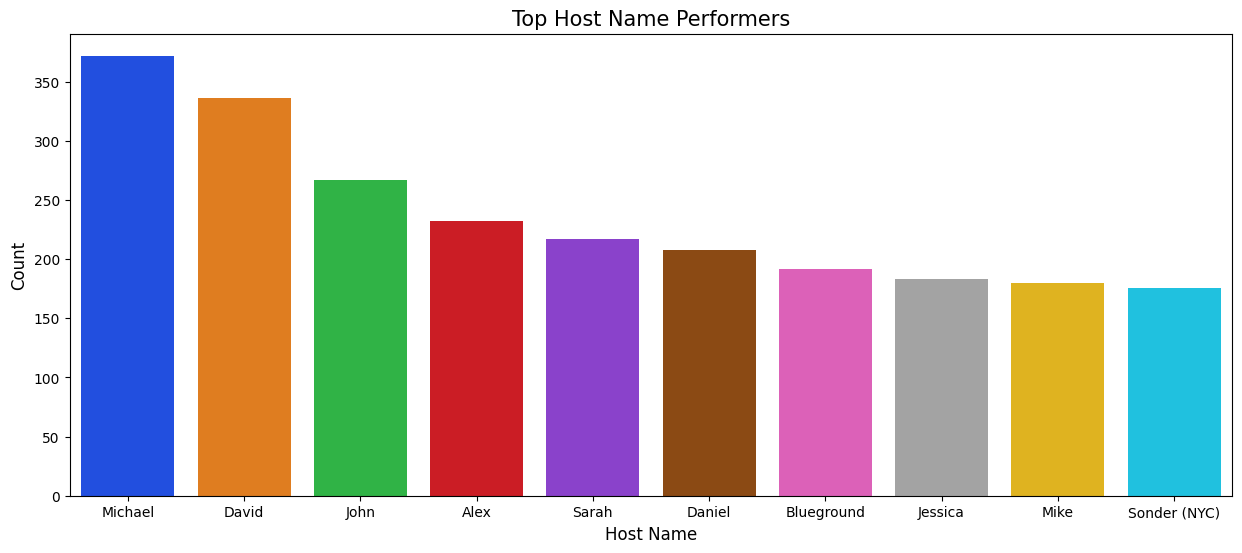

In [17]:
# Extracting top 10 host names and their counts
top_host_names = df['host_name'].value_counts().index[:10]
top_host_counts = df['host_name'].value_counts().values[:10]

# Visualizing using bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x=top_host_names, y=top_host_counts, palette='bright')
plt.title("Top Host Name Performers", fontsize=15)
plt.xlabel("Host Name", fontsize=12)
plt.ylabel("Count", fontsize=12)
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [18]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        19095
Brooklyn         18275
Queens            4829
Bronx              903
Staten Island      324
Name: count, dtype: int64

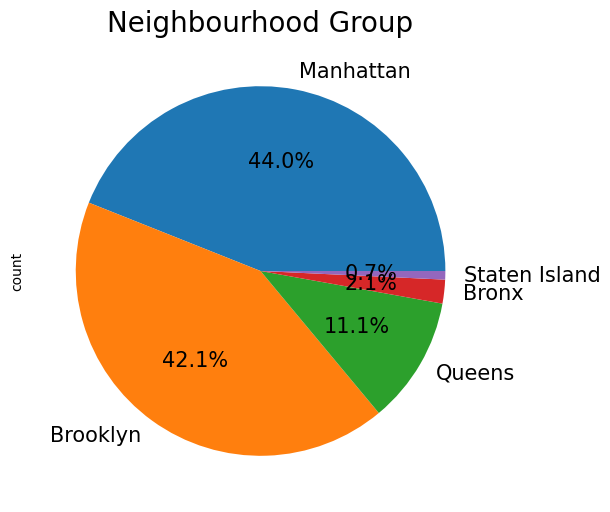

In [19]:
df['neighbourhood_group'].value_counts().plot(kind = 'pie', figsize = (6,6), autopct = '%1.1f%%', fontsize = 15)
plt.title("Neighbourhood Group", fontsize = 20)
plt.show()

##Manhatten group has the largest bookings.Followed by brooklyn with 41.1% share.

In [20]:
df['host_id'].value_counts().reset_index().iloc[:10]

,host_id,count
0,107434423.0,192
1,219517861.0,176
2,30283594.0,119
3,12243051.0,96
4,16098958.0,96
5,137358866.0,88
6,61391963.0,88
7,22541573.0,85
8,200380610.0,65
9,1475015.0,52


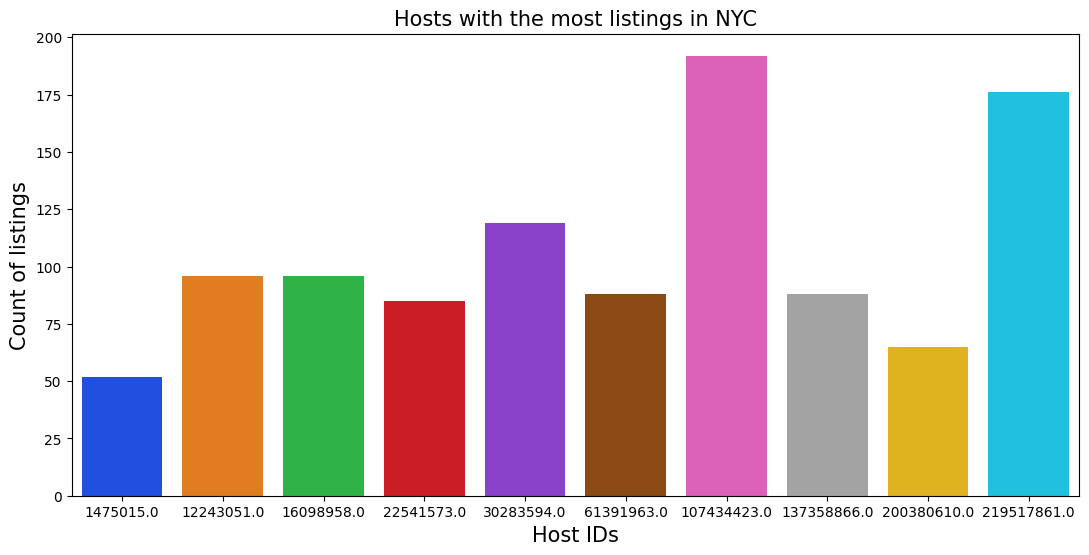

In [21]:
plt.figure(figsize = (13,6))
sns.barplot(x=df['host_id'].value_counts().index[:10], y=df['host_id'].value_counts().values[:10],
                 palette='bright')
plt.title("Hosts with the most listings in NYC", fontsize = 15)
plt.xlabel("Host IDs", fontsize = 15)
plt.ylabel("Count of listings", fontsize = 15)
plt.show()

##group according to price

In [22]:
df.shape

(43427, 13)

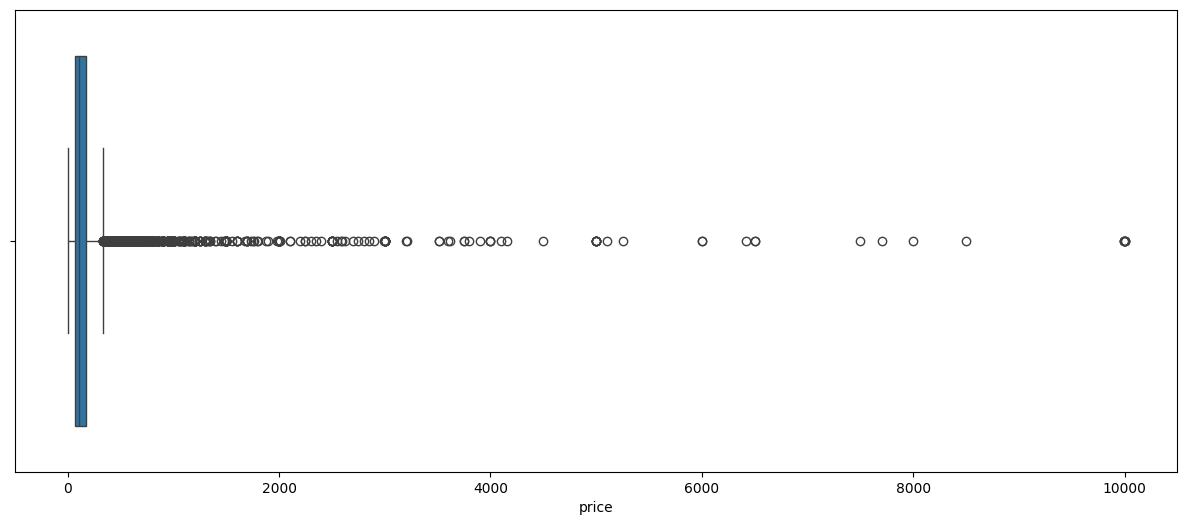

In [23]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['price'])
plt.show()

In [24]:
df['price'].describe()

count    43426.000000
mean       149.571777
std        237.780407
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

##probability density function graph.
describe random variable and its probability

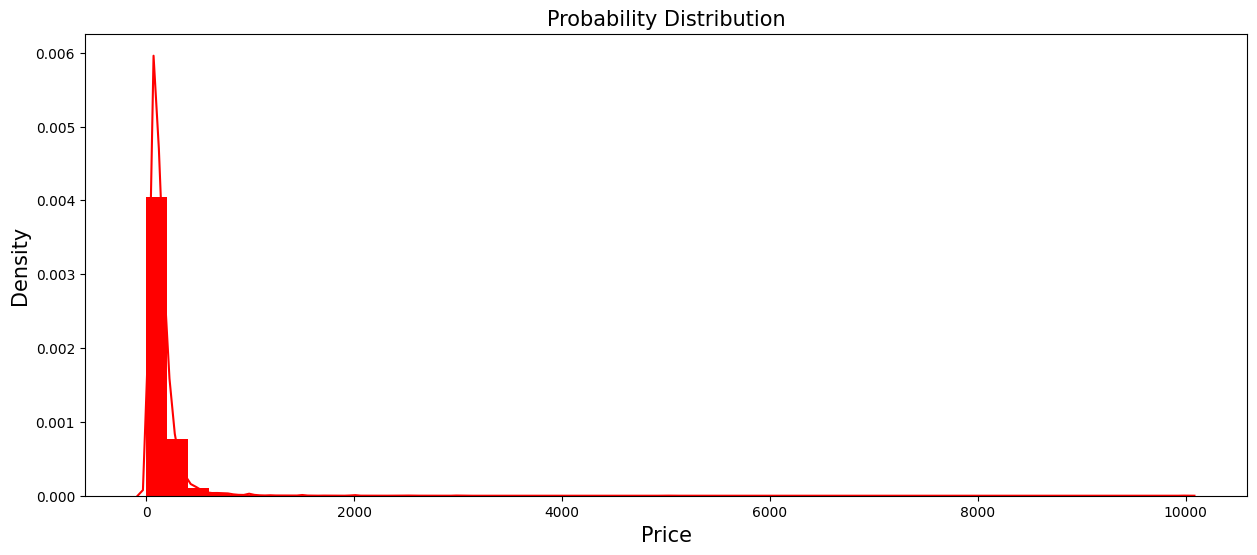

In [25]:
plt.figure(figsize=(15,6))
sns.distplot(df['price'],color='red',hist_kws={'linewidth':15,'alpha':1})
plt.title("Probability Distribution", fontsize = 15)
plt.xlabel('Price', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.show()

##Normal Distribution
most data points cluster toward the middle of range. middle of the range is also known as mean of distribution

In [26]:
Q1=np.percentile(df['price'],25,interpolation='midpoint')
Q3=np.percentile(df['price'],75,interpolation='midpoint')
IQR=Q3-Q1
print('The IQR is:',IQR)
print('The Minimum value is', (Q3 - (1.5* (IQR))))
print('The maximum value is', (Q3 + (1.5* (IQR))))


The IQR is: nan
The Minimum value is nan
The maximum value is nan


### As we can see that 99% of the data lies withing 334 dollar with mean being 153 and median 106.

In [27]:
new_df=df[df['price']<334]
new_df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0
1,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0
2,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,0,1.0,365.0
3,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0
4,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,0.1,1.0,0.0


In [28]:
df.groupby(['neighbourhood_group'])['price'].describe().T.reset_index()


neighbourhood_group,index,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,count,903.000000,18275.000000,19095.000000,4829.000000,324.000000
1,mean,87.229236,122.269603,192.370778,97.715055,113.805556
2,std,108.844575,173.930165,294.392598,172.889663,289.554065
3,min,0.000000,0.000000,0.000000,10.000000,20.000000
4,25%,46.000000,60.000000,92.000000,50.000000,50.000000
5,50%,65.000000,90.000000,145.000000,74.000000,75.000000
6,75%,99.000000,149.000000,210.000000,110.000000,109.000000
7,max,2500.000000,10000.000000,10000.000000,10000.000000,5000.000000


In [29]:
new_df.groupby(['neighbourhood_group'])['price'].describe().T.reset_index()

neighbourhood_group,index,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,count,886.000000,17696.000000,17369.000000,4753.000000,318.000000
1,mean,77.267494,105.529894,143.758420,87.730276,89.053459
2,std,46.771323,60.406487,69.320686,52.157711,57.569163
3,min,0.000000,0.000000,0.000000,10.000000,20.000000
4,25%,45.000000,60.000000,89.000000,50.000000,50.000000
5,50%,65.000000,90.000000,130.000000,71.000000,75.000000
6,75%,95.000000,140.000000,195.000000,105.000000,105.000000
7,max,325.000000,333.000000,333.000000,325.000000,300.000000


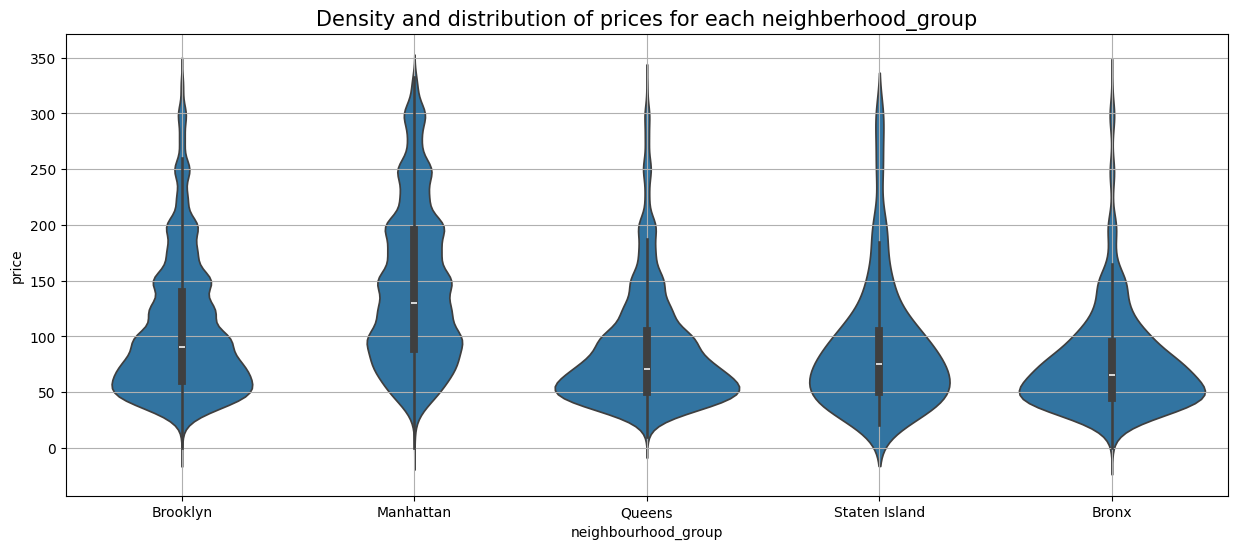

In [30]:
plt.figure(figsize = (15,6))
sns.violinplot(data = new_df, x = new_df['neighbourhood_group'], y = new_df['price'])
plt.title('Density and distribution of prices for each neighberhood_group', fontsize = 15)
plt.grid()

### Violin Plot
A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable.

Text(0.5, 1.0, 'Bronx')

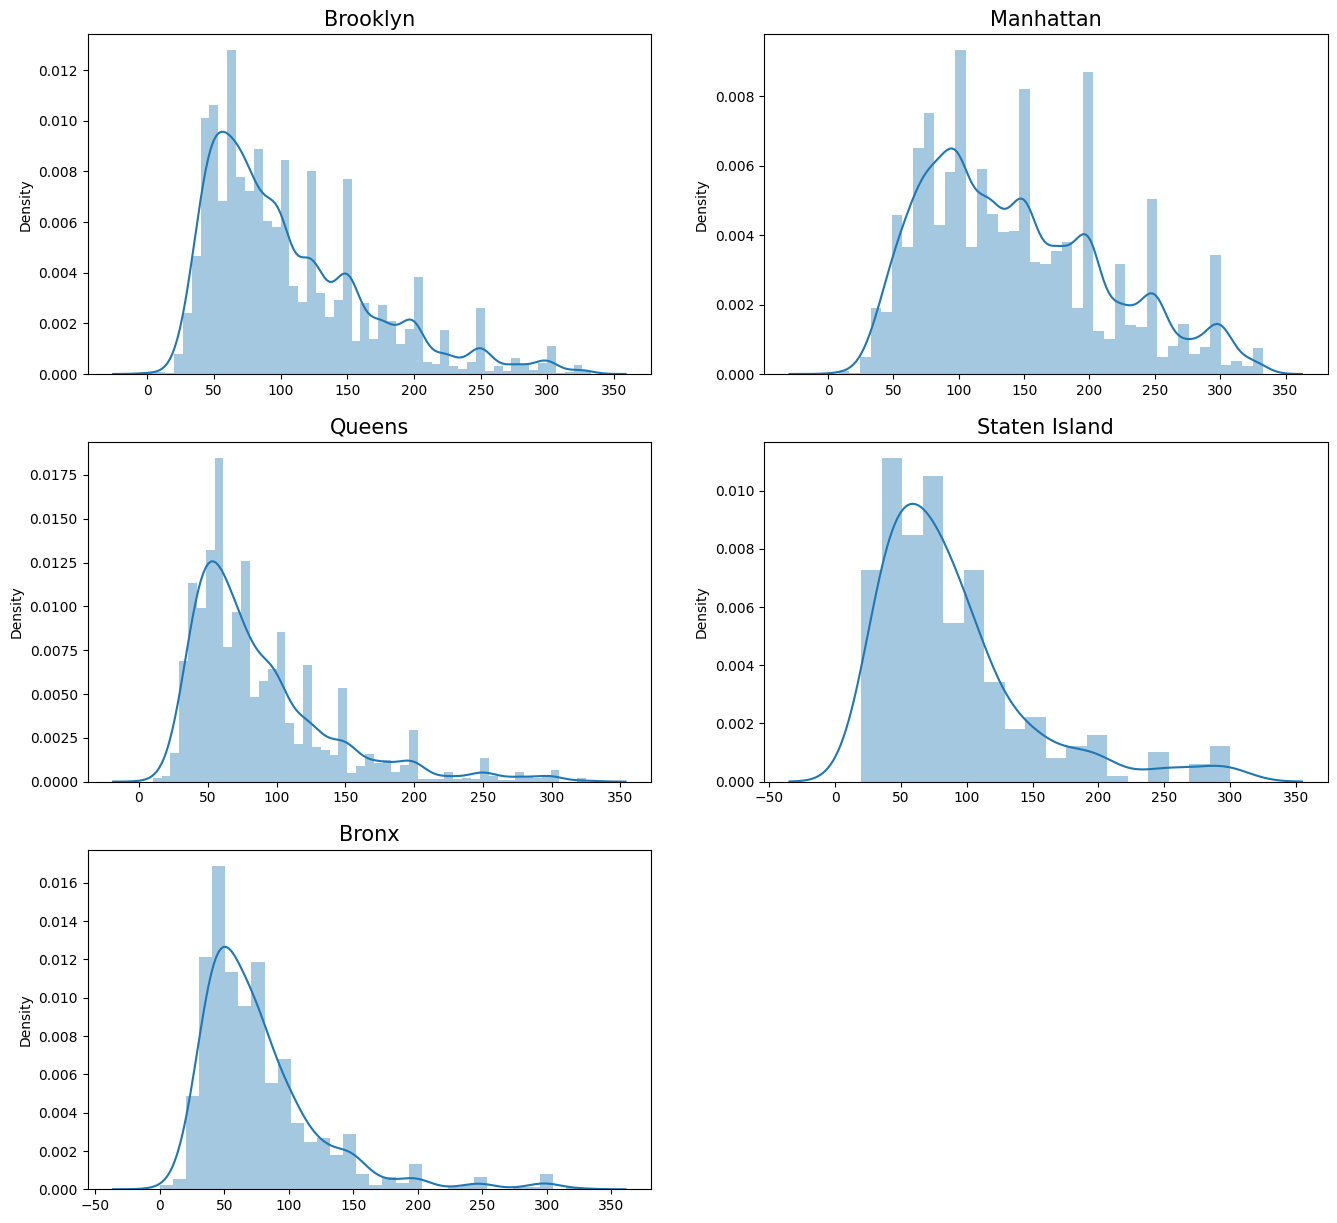

In [32]:
plt.figure(figsize=(16,15))

plt.subplot(3,2,1)
n1=new_df[new_df['neighbourhood_group']=='Brooklyn']
sns.distplot(x=n1['price'])
plt.title('Brooklyn',fontsize=15)

plt.subplot(3,2,2)
n2 = new_df[new_df['neighbourhood_group'] == 'Manhattan']
sns.distplot(x = n2['price'])
plt.title("Manhattan", fontsize = 15)

plt.subplot(3,2,3)
n3 = new_df[new_df['neighbourhood_group'] == 'Queens']
sns.distplot(x = n3['price'])
plt.title("Queens", fontsize = 15)

plt.subplot(3,2,4)
n4 = new_df[new_df['neighbourhood_group'] == 'Staten Island']
sns.distplot(x = n4['price'])
plt.title("Staten Island", fontsize = 15)

plt.subplot(3,2,5)
n5 = new_df[new_df['neighbourhood_group'] == 'Bronx']
sns.distplot(x = n5['price'])
plt.title("Bronx", fontsize = 15)

### Histplot
Histplot is a combination of 3 plots. <br>
**1. Histogram** - A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis. The vertical y-axis represents the number count or percentage of occurrences in the data for each column. <br>

**2. KDE** - Kernal Density Estimation - Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables i.e. we can plot for the univariate or multiple variables altogether. <br>

**3. Rugplot** - A rug plot is a plot of data for a single quantitative variable, displayed as marks along an axis. It is used to visualise the distribution of the data.

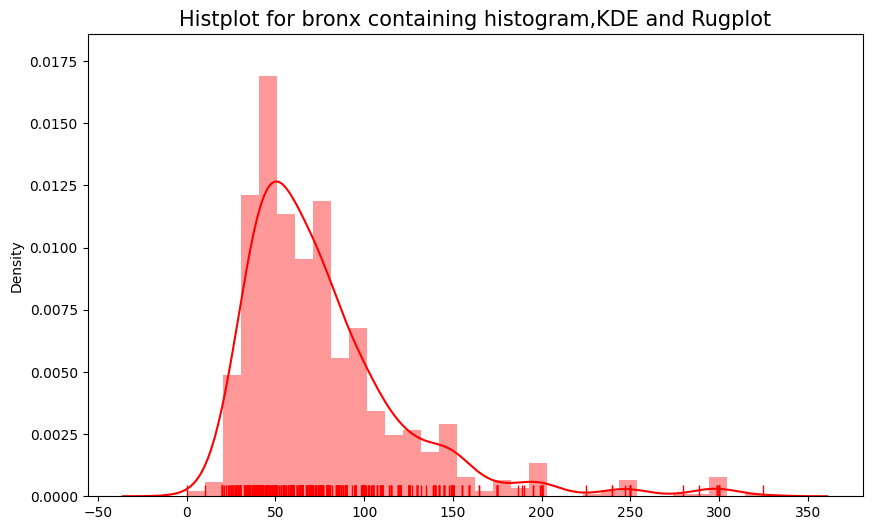

In [33]:
plt.figure(figsize=(10,6))
sns.distplot(x=n5['price'],rug=True,color='r')
plt.title('Histplot for bronx containing histogram,KDE and Rugplot',fontsize=15)
plt.show()

### Observation
1. we can observe that state that Manhattan has the highest range of prices for the listings with 150 price as median observation, followed by Brooklyn with 90 per night.
2. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all.
3. This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.

In [34]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0
1,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0
2,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,0,1.0,365.0
3,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0
4,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,0.1,1.0,0.0


In [35]:
df['room_type'].value_counts()

room_type
Entire home/apt    22475
Private room       20006
Shared room          945
Name: count, dtype: int64

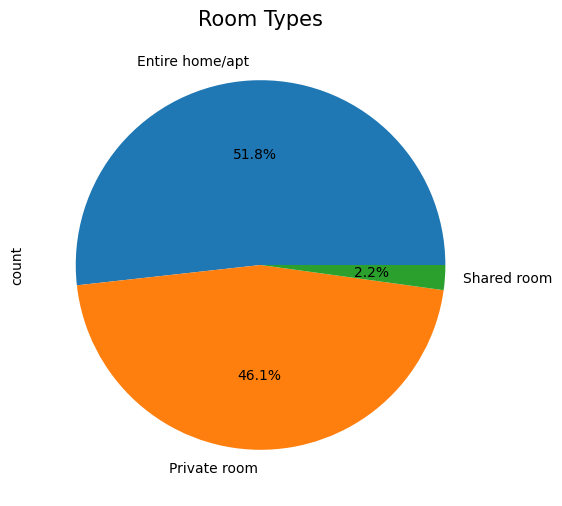

In [38]:
df['room_type'].value_counts().plot(kind='pie',figsize=(6,6),fontsize=10,autopct='%1.1f%%')
plt.title('Room Types',fontsize=15)
plt.show()

### Observation
1. Most of the people happen to rent the entire home or apartment which constitutes to 52% according to the chart.
2. Followed by 45.7% people consider having private room, and shared is the least considered room type.

In [40]:
df.groupby(['room_type'])['price'].mean().reset_index()

,room_type,price
0,Entire home/apt,206.903048
1,Private room,88.832400
2,Shared room,71.933333


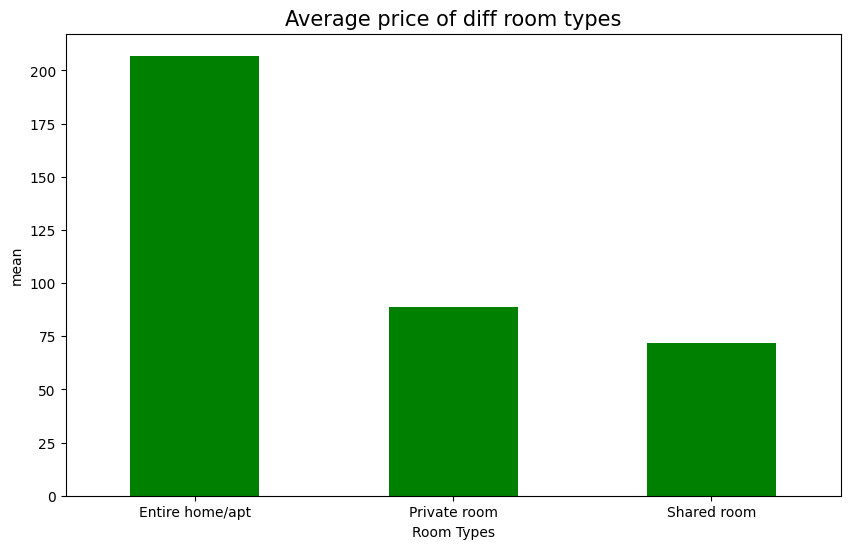

In [44]:
df.groupby(['room_type'])['price'].mean().plot(kind='bar',figsize=(10,6),color='g')
plt.xticks(rotation=360)
plt.title('Average price of diff room types',fontsize=15)
plt.xlabel('Room Types',fontsize=10)
plt.ylabel('mean',fontsize=10)
plt.show()

In [46]:
df.groupby(['room_type'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,22475.0,206.903048,284.155396,0.0,119.0,158.0,225.0,10000.0
Private room,20006.0,88.832400,154.283163,0.0,50.0,70.0,95.0,10000.0
Shared room,945.0,71.933333,108.047055,0.0,35.0,46.0,75.0,1800.0


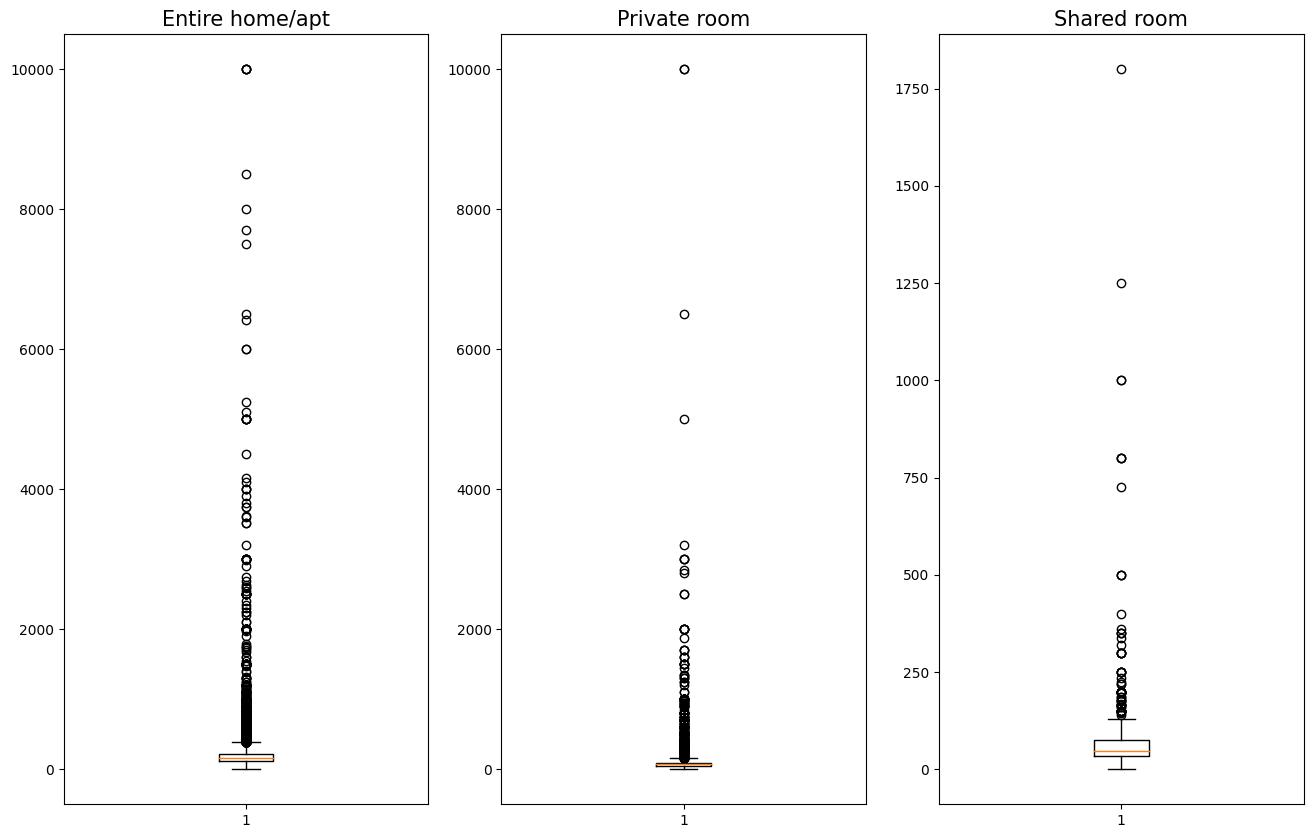

In [49]:
plt.figure(figsize=(16,10))

plt.subplot(1,3,1)
entire=df[df['room_type']=='Entire home/apt']
plt.boxplot(x=entire['price'])
plt.title('Entire home/apt',fontsize=15)

plt.subplot(1,3,2)
private = df[df['room_type'] == 'Private room']
plt.boxplot(x  = private['price'])
plt.title("Private room", fontsize = 15)

plt.subplot(1,3,3)
shared = df[df['room_type'] == 'Shared room']
plt.boxplot(x  = shared['price'])
plt.title("Shared room", fontsize = 15)

plt.show()

### Observation
1. As we can see from the boxplot, the room type Entire home/apt has highest price going upto 10000 dollars, also it has a lot of outliers which means that the average price would be higher compared to the other two.
2. On the other hand, Private room has less outliers compared to the entire home/apt but the price also goes upto 10000 dollars. But, it has the avergae price of 90 dollar approximately.
3. Shared room is the least preffered room type and it also reflect to the the mean price and outliers. The maximum price of the shared room is only 1000 dollars and has the average price revolving around 70 dollar.

In [50]:
round(df.groupby(['room_type'])['minimum_nights'].mean().reset_index(),0)

,room_type,minimum_nights
0,Entire home/apt,9.0
1,Private room,5.0
2,Shared room,7.0


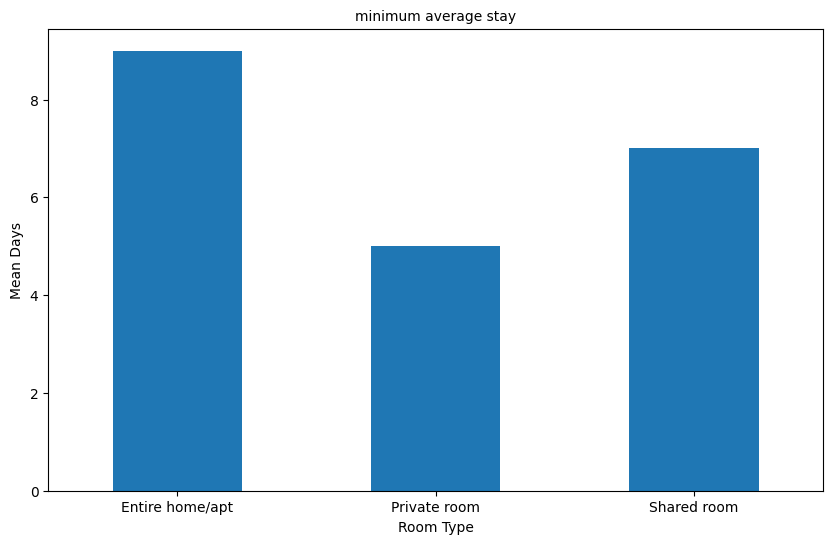

In [51]:
round(df.groupby(['room_type'])['minimum_nights'].mean(),0).plot(kind='bar',figsize=(10,6),fontsize=10)
plt.xticks(rotation=360)
plt.title("minimum average stay",fontsize=10)
plt.xlabel('Room Type',fontsize=10)
plt.ylabel('Mean Days',fontsize=10)
plt.show()

### Drawing the Boxplot so that we can has an idea about extreme values

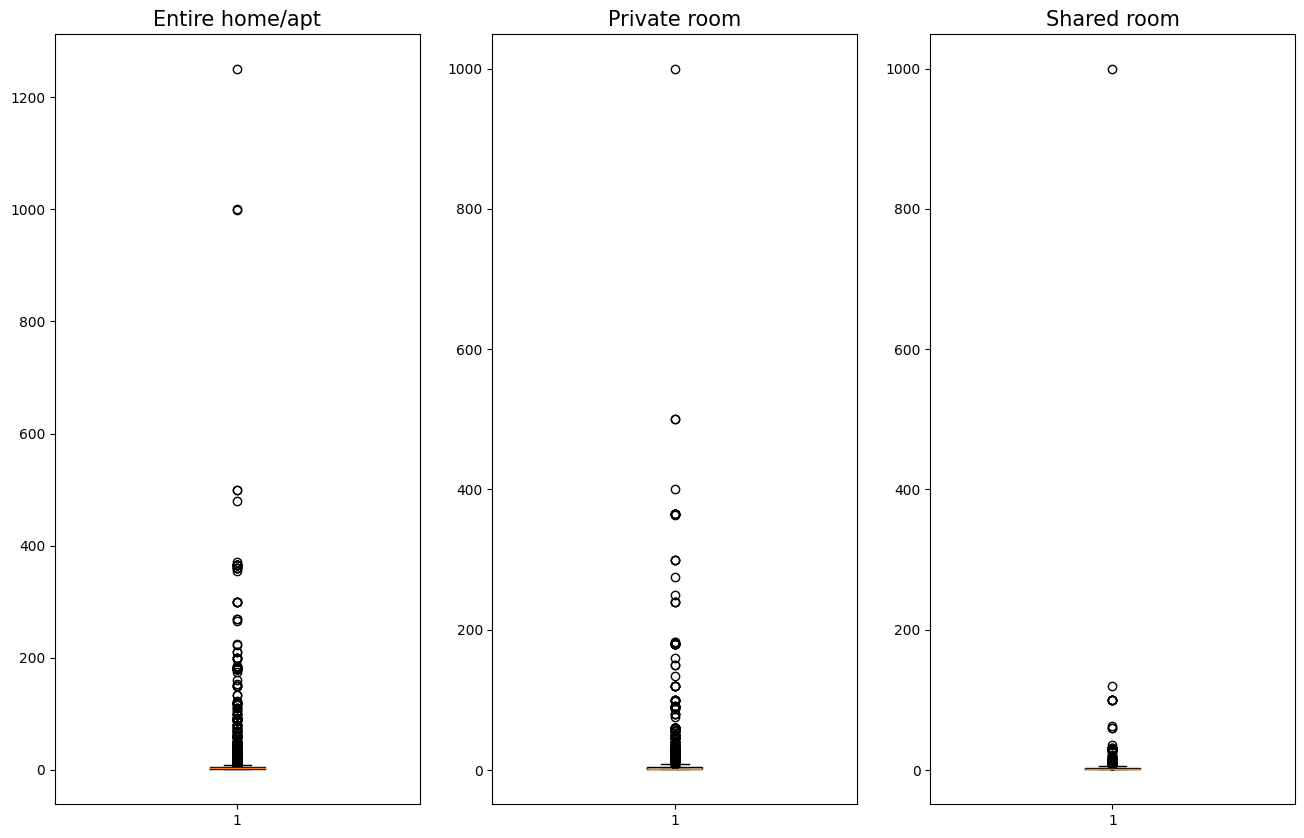

In [52]:
plt.figure(figsize = (16,10))

plt.subplot(1,3,1)
entire1 = df[df['room_type'] == 'Entire home/apt']
plt.boxplot(x  = entire1['minimum_nights'])
plt.title("Entire home/apt", fontsize = 15)

plt.subplot(1,3,2)
private1 = df[df['room_type'] == 'Private room']
plt.boxplot(x  = private1['minimum_nights'])
plt.title("Private room", fontsize = 15)

plt.subplot(1,3,3)
shared1 = df[df['room_type'] == 'Shared room']
plt.boxplot(x  = shared1['minimum_nights'])
plt.title("Shared room", fontsize = 15)

plt.show()

In [53]:
df['availability_365'].value_counts().iloc[:10].sort_index()

availability_365
0.0      17239
1.0        356
2.0        236
3.0        277
5.0        283
89.0       310
90.0       240
179.0      233
364.0      443
365.0     1102
Name: count, dtype: int64

Text(0.5, 1.0, 'Availability 365')

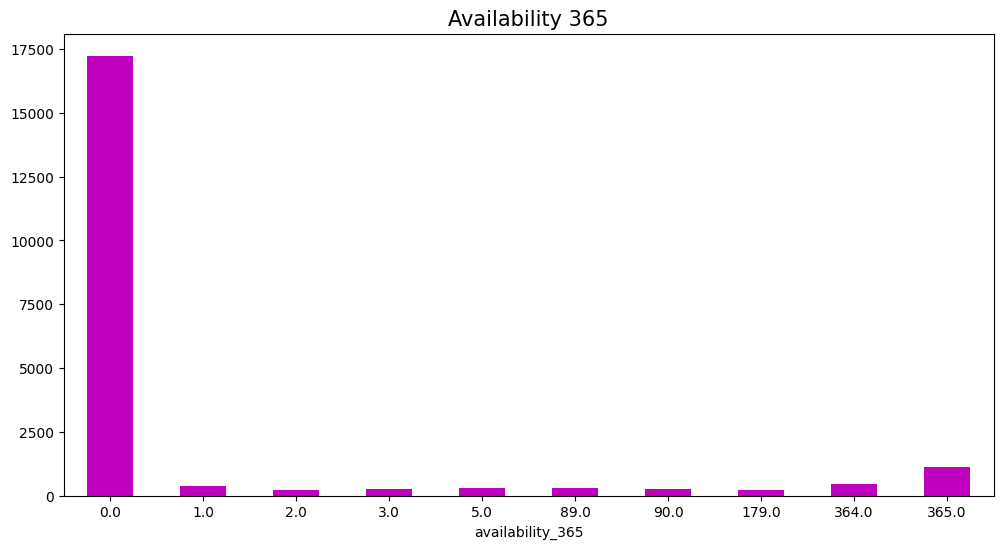

In [55]:
df['availability_365'].value_counts().iloc[:10].sort_index().plot(kind='bar',figsize=(12,6),color='m',fontsize=10)
plt.xticks(rotation=360)
plt.title('Availability 365',fontsize=15)

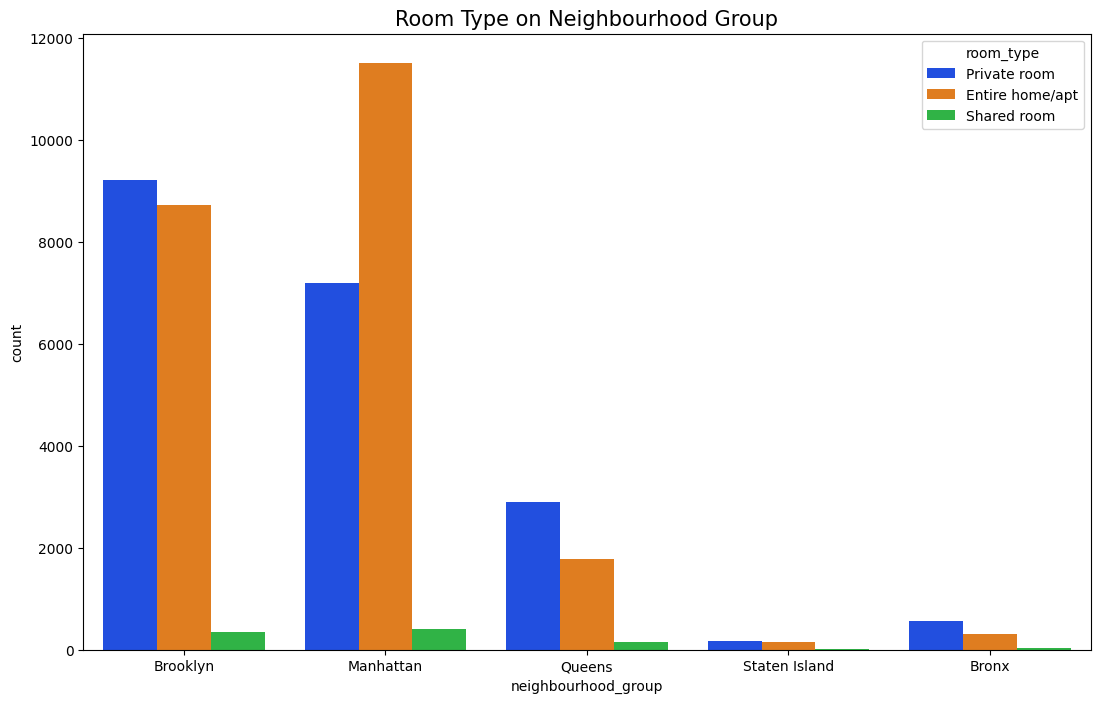

In [59]:
plt.figure(figsize = (13,8))
sns.countplot(data = df, x="neighbourhood_group", hue="room_type", palette="bright")
plt.title("Room Type on Neighbourhood Group", fontsize = 15)
plt.show()

### Observation
1. It looks like, the neighbourhood group Manhatten has the highest Entire home amongst all othergroups.
2. but Brooklyn has the most number iof private rooms.
3. Manhatten and Brooklyn has almost same number of Shared room.

In [63]:
print(df['neighbourhood'].value_counts().iloc[:10], '\n')
print(df['neighbourhood'].value_counts().tail(10))

neighbourhood
Williamsburg          3572
Bedford-Stuyvesant    3370
Harlem                2427
Bushwick              2189
Upper West Side       1806
East Village          1700
Hell's Kitchen        1620
Upper East Side       1610
Crown Heights         1432
Midtown               1289
Name: count, dtype: int64 

neighbourhood
Lighthouse Hill    2
Co-op City         2
Silver Lake        2
Prince's Bay       2
New Dorp           1
Rossville          1
Richmondtown       1
Fort Wadsworth     1
Woodrow            1
Willowbrook        1
Name: count, dtype: int64
